In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score
from sklearn.cluster import KMeans
from datetime import datetime

import numpy as np

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('train_dataset_train.csv')


Выделяем  категориальные признаки

In [4]:
df.dtypes[df.dtypes == "object"].values

array([dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O'),
       dtype('O'), dtype('O'), dtype('O'), dtype('O'), dtype('O')],
      dtype=object)

In [5]:
mass_object = df.dtypes[df.dtypes == "object"].index.values

In [6]:
mass_object 

array(['month_id', 'carts_created_at', 'promo', 'communication_type',
       'ABC', 'city', 'country', 'os', 'browser', 'platform'],
      dtype=object)

Кодируем признаки средними значениями

In [7]:
#https://dyakonov.org/2016/08/03/python-%D0%BA%D0%B0%D1%82%D0%B5%D0%B3%D0%BE%D1%80%D0%B8%D0%B0%D0%BB%D1%8C%D0%BD%D1%8B%D0%B5-%D0%BF%D1%80%D0%B8%D0%B7%D0%BD%D0%B0%D0%BA%D0%B8/

def feature_mean(data,cat_feature,real_feature):
    return (data[cat_feature].map(data.groupby(cat_feature)[real_feature].mean()))


In [8]:
df['browser_price'] = feature_mean(df,'browser','price')


df['os_price'] = feature_mean(df,'os','price')
df['os_student'] = feature_mean(df,'os','student_id')

In [9]:
df['browser_price'].shape

(200000,)

In [10]:
df['browser_price'].isna().sum()

122626

In [11]:
df['city_price'] = feature_mean(df,'city','price')



df['city_student'] = feature_mean(df,'city','student_id')

df['browser_student'] = feature_mean(df,'browser','student_id')

df['student_price'] = feature_mean(df,'student_id','price')

In [12]:
df['ABC_price'] = feature_mean(df,'ABC','price')

df['ABC_student'] = feature_mean(df,'ABC','student_id')

In [13]:
df['os_student'] = feature_mean(df,'os','student_id')


df['os_price'] = feature_mean(df,'os','price')



In [14]:
df['gender_price'] = feature_mean(df,'gender','price')
df['gender_student'] = feature_mean(df,'gender','student_id')

Кодируем признак ABC

In [15]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df["ABC"] = le.fit_transform(df["ABC"])
df["ABC"].unique()

array([3, 0, 1, 2])

Новая переменная - процент пропущенных звонков

In [16]:
df['missed_percent'] = df['m_missed_calls']/df['m_total_calls']

df['missed_percent'] =  df['missed_percent'].fillna(-1)

Кодируем признак участия в промо-акциях

In [17]:
df['promo'] = df['promo'].map({'+': 1, '-': 0})

In [18]:
df[['month_id','carts_created_at']]

,month_id,carts_created_at
0,9/30/2020,8/26/2020
1,6/30/2021,8/5/2020
2,2/28/2021,6/20/2020
3,11/30/2021,4/14/2021
4,10/31/2020,7/19/2020
...,...,...
199995,11/30/2021,10/16/2020
199996,9/30/2021,1/2/2021
199997,3/31/2021,6/29/2020
199998,6/30/2021,12/7/2020


Выделяем месяц из даты, формируем переменные - комбинации

In [20]:
def get_month(date):
    return date.split('/')[0]
    
df['month_id_m'] =df['month_id'].apply(get_month)

df['carts_created_m'] =df['carts_created_at'].apply(get_month)

df['feedback_avg_d135'] =  df['feedback_avg_d3'] + df['feedback_avg_d1'] + df['feedback_avg_d5']
df['webinar_lessons'] = df['webinars'] + df['lessons']

Кластеризация признаков обучение модели, проверка

In [21]:
kmeans = KMeans(n_clusters=6)
X_cluster = df.loc[:, ['id',
                       "student_id", 
                       'price',
                        'student_price',
                       'carts_created_m',
                       
                       'age_indicator',
                                             
                       'p_missed_calls',
                       'program_id', 
                       
                       'month_id_m',  
        
                       'p_total_calls', 
                       'p_was_conversations', 
                       'p_total_duration',
                       'support_feedback_avg',
                       
                       'feedback_avg_d1', 
        
                        'feedback_avg_d3', 
                        'feedback_avg_d5', 
                       
                       'webinar_lessons',
                       'feedback_avg_d135'
                       
                         
                                            
                      ]].fillna(-1)

X_cluster["Cluster"] = kmeans.fit_predict(X_cluster )
# X_klaster["Cluster"] = X_klaster ["Cluster"].astype("category")
df['cluster'] = X_cluster ["Cluster"].astype("int")


#время
start_time = datetime.now()

X = df[[
         'ABC', 
        'cluster',
        'id', 'age_indicator', 'student_id', 
        'program_id',
         'spent_time_total', 'spent_time_to_complete_hw',
        
        'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
        'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
        
        'webinars', 'lessons',
        
        'hw_leader', 'avg_quiz_result',
    
        'activity', 
     
        'bought_d1',
         'bought_d2', 
        'bought_d3',         
         'bought_d4',    
        'bought_d5', 
       
        'bought_avg_duration',
    
        'payment_type', 
       'promo', 'price',
        
       'gender', 'speed_recall',  
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
        
       'm_total_calls', 
       'p_avg_duration', 'p_missed_calls',
        
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 
       'feedback_avg_d1', 
        'feedback_avg_d3', 
       'feedback_avg_d5',         
       'browser_price', 'student_price',       
       'city_price', 'ABC_price', 
       'missed_percent',
       'os_student','os_price',
      'city_student', 'browser_student','ABC_student',    
      'gender_price', 'gender_student',
       'month_id_m',  'carts_created_m'
    

       ]].fillna(-1)

y_ravel =  df["target"].ravel()
y = np.array(y_ravel).astype(int)

    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.99999,random_state=42)

from sklearn.ensemble import RandomForestClassifier


rfc = RandomForestClassifier(bootstrap = False,
                             criterion ='entropy', max_features = 28, 
                             n_estimators = 675,
                             random_state=17,n_jobs = -1,
                             warm_start = True)

rfc.fit(X_train, y_train)
y_pred_rfc= rfc.predict(X_test)

# время
print(datetime.now() - start_time)

precision_score(y_test, y_pred_rfc,  average='macro') * 0.8 + recall_score(y_test, y_pred_rfc, average='macro') * 0.2


0:24:43.065108


1.0

Вычисление важности признаков

Wall time: 12.2 s


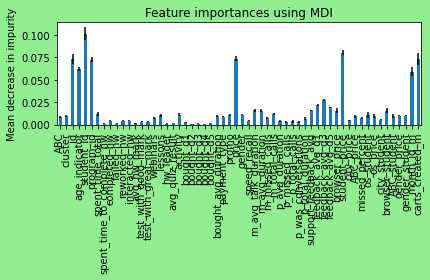

In [22]:
%%time
import numpy as np
import matplotlib.pyplot as plt

feature_names = X.columns
importances = rfc.feature_importances_
std = np.std([tree.feature_importances_ for tree in rfc.estimators_], axis=0)

forest_importances = pd.Series(importances, index=feature_names)

fig, ax = plt.subplots()
fig.patch.set_facecolor('lightgreen')
forest_importances.plot.bar(yerr=std, ax=ax)

ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [23]:
forest_importances.sort_values(ascending = False)[:50]

student_id              0.101491
student_price           0.080002
price                   0.073667
carts_created_m         0.073294
id                      0.072743
program_id              0.072531
age_indicator           0.062132
month_id_m              0.058938
feedback_avg_d3         0.027528
feedback_avg_d1         0.022137
feedback_avg_d5         0.019277
m_avg_talk_duration     0.016126
support_feedback_avg    0.015786
browser_student         0.015564
m_avg_duration          0.015548
browser_price           0.015441
spent_time_total        0.012353
m_total_calls           0.011944
gender                  0.011222
os_student              0.011120
activity                0.010828
promo                   0.010647
lessons                 0.010286
gender_price            0.010188
gender_student          0.010187
bought_avg_duration     0.010129
cluster                 0.009964
ABC_student             0.009725
os_price                0.009651
ABC_price               0.009392
ABC       

# Применение

In [24]:
df_test = pd.read_csv('content/test.csv')

In [25]:
df_test['month_id_m'] =df['month_id'].apply(get_month)

df_test['carts_created_m'] =df['carts_created_at'].apply(get_month)

In [26]:
le = LabelEncoder()
df_test["ABC"] = le.fit_transform(df_test["ABC"])

In [27]:

df_test['browser_price'] = feature_mean(df,'browser','price')


df_test['os_price'] = feature_mean(df,'os','price')
df_test['os_student'] = feature_mean(df,'os','student_id')


df_test['city_price'] = feature_mean(df,'city','price')
df_test['city_student'] = feature_mean(df,'city','student_id')
df_test['browser_student'] = feature_mean(df,'browser','student_id')
df_test['student_price'] = feature_mean(df,'student_id','price')



df_test['ABC_price'] = feature_mean(df,'ABC','price')
df_test['ABC_student'] = feature_mean(df,'ABC','student_id')

df_test['gender_price'] = feature_mean(df,'gender','price')
df_test['gender_student'] = feature_mean(df,'gender','student_id')


In [28]:
df_test['missed_percent'] = df['m_missed_calls']/df['m_total_calls']

df_test['missed_percent'] =  df['missed_percent'].fillna(-1)

In [29]:
df_test['promo'] = df['promo'].map({'+': 1, '-': 0})

In [30]:
df_test['feedback_avg_d135'] =  df['feedback_avg_d3'] + df['feedback_avg_d1'] + df['feedback_avg_d5']
df_test['webinar_lessons'] = df['webinars'] + df['lessons']

Кластеризация

In [31]:
kmeans = KMeans(n_clusters=6)

X_cluster = df_test.loc[:, ['id',
                       "student_id", 
                       'price',
                        'student_price',
                       'carts_created_m',
                            
                       'age_indicator',
                       "carts_created_m",
                       
                       'p_missed_calls',
                       'program_id', 
                       
                       'month_id_m',  
        
                       'p_total_calls', 
                       'p_was_conversations', 
                       'p_total_duration',
                       'support_feedback_avg',
                       
                       'feedback_avg_d1', 
        
                        'feedback_avg_d3', 
                        'feedback_avg_d5', 
                       
                       'webinar_lessons',
                       'feedback_avg_d135'
                       
                      
                         
                                            
                      ]].fillna(-1)



In [32]:
X_cluster["Cluster"] = kmeans.fit_predict(X_cluster )
df_test['cluster'] = X_cluster ["Cluster"].astype("int")

In [33]:

X_result = df_test[['ABC', 
        'cluster',
        'id', 'age_indicator', 'student_id', 
        'program_id',
         'spent_time_total', 'spent_time_to_complete_hw',
        
        'completed_hw', 'failed_hw', 'reworked_hw', 'interacted_hw',
        'avg_hw_mark', 'test_with_good_mark', 'test_with_great_mark',
        
        'webinars', 'lessons',
        
        'hw_leader', 'avg_quiz_result',
    
        'activity', 
     
        'bought_d1',
         'bought_d2', 
        'bought_d3',         
         'bought_d4',    
        'bought_d5', 
       
        'bought_avg_duration',
    
        'payment_type', 
       'promo', 'price',
        
       'gender', 'speed_recall',  
       'm_avg_talk_duration', 'm_avg_duration', 'm_missed_calls',
        
       'm_total_calls', 
       'p_avg_duration', 'p_missed_calls',
        
       'p_total_calls', 'p_was_conversations', 'p_total_duration',
       'support_feedback_avg', 
       'feedback_avg_d1', 

        
       'feedback_avg_d3', 

       'feedback_avg_d5', 
        
       'browser_price', 'student_price',   
    
       'city_price', 'ABC_price', 
       'missed_percent',
       'os_student','os_price',
      'city_student', 'browser_student','ABC_student',
    
      'gender_price', 'gender_student',
       'month_id_m',  'carts_created_m'
                     ]]


In [34]:
X_result= X_result.fillna(-1)

Вычисление предсказываемой величины

In [35]:
pred_res = rfc.predict(X_result)

Итоговый csv

In [36]:
df_pred = pd.DataFrame(pred_res,columns = ['target'])

In [37]:
df_res = pd.concat([X_result['id'],df_pred],axis = 1,ignore_index=False)

In [38]:
df_res.to_csv('result_816.csv', index=False)
print('OK')

OK


Проверка кросс-валидацией


In [ ]:
# https://scikit-learn.org/stable/modules/cross_validation.html
from sklearn.model_selection import cross_val_score
from sklearn import svm

scores = cross_val_score(rfc, X, y, cv=5)


In [ ]:
print("%0.2f accuracy with a standard deviation of %0.5f" % (scores.mean(), scores.std()))